# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 5.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
338592,0.0024,0.0879,0.0073,0.0024,0.0122,0.0488,0.4370,0.7397,0.2441,0.4248,3,3,11,11
122072,0.0024,0.0391,0.0244,0.0854,0.0049,0.0098,0.1929,0.4150,0.1318,0.4639,0,0,0,0
188418,0.0024,0.2930,0.0073,0.0024,0.0049,0.0073,0.2393,0.3320,0.1953,0.2588,5,5,11,11
231585,0.0024,0.9106,0.2686,0.0562,0.0171,0.0391,0.1733,0.4980,0.1660,0.3271,0,6,0,16
143215,0.0024,0.1660,0.0024,0.0024,0.0024,0.0024,0.0806,0.2686,0.0073,0.3027,1,0,6,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457542 entries, 0 to 457541
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          457542 non-null  float64
 1   Emg2          457542 non-null  float64
 2   Emg3          457542 non-null  float64
 3   Emg4          457542 non-null  float64
 4   Emg5          457542 non-null  float64
 5   Emg6          457542 non-null  float64
 6   Emg7          457542 non-null  float64
 7   Emg8          457542 non-null  float64
 8   Emg9          457542 non-null  float64
 9   Emg10         457542 non-null  float64
 10  repetition    457542 non-null  int64  
 11  rerepetition  457542 non-null  int64  
 12  stimulus      457542 non-null  int64  
 13  restimulus    457542 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.9 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000
mean,0.003303,0.278760,0.177623,0.155209,0.042417,0.048302,0.324129,0.496742,0.163677,0.330758,3.221488,2.608939,5.708877,4.624408
std,0.006182,0.430364,0.444744,0.347002,0.092262,0.096046,0.482787,0.504943,0.181937,0.293560,3.489071,3.373117,6.594250,6.359818
min,0.000000,0.000000,0.002400,0.002400,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.012200,0.002400,0.002400,0.002400,0.002400,0.097700,0.214800,0.034200,0.173300,0.000000,0.000000,0.000000,0.000000
50%,0.002400,0.144000,0.026900,0.007300,0.002400,0.009800,0.175800,0.341800,0.105000,0.249000,2.000000,0.000000,3.000000,0.000000
75%,0.002400,0.354000,0.161100,0.170900,0.039100,0.048800,0.329600,0.585900,0.236800,0.378400,6.000000,5.000000,10.000000,9.000000
max,0.593300,4.665500,4.660600,4.665500,1.369600,1.420900,4.665500,4.668000,2.927200,3.752400,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     189565
8      15503
7      15495
12     15495
2      15495
4      15488
5      15469
6      15461
9      15451
11     15451
10     15424
3      15422
1      15421
13     10331
14     10330
17     10321
15     10293
16     10254
19      5163
21      5163
18      5161
22      5135
20      5126
23      5125
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.142904,-0.391311,-0.394138,-0.399275,-0.301307,-0.090992,0.181893,0.058396,0.824933,0.528107
1,-0.142904,-0.444583,-0.409329,-0.418901,-0.301307,-0.115216,0.148934,0.003920,0.812102,0.473246
2,-0.142904,-0.503313,-0.424728,-0.445249,-0.325507,-0.161727,0.092459,-0.064313,0.824933,0.418384
3,-0.142904,-0.556585,-0.424728,-0.458422,-0.350715,-0.209206,0.050056,-0.123251,0.812102,0.324381
4,-0.142904,-0.599158,-0.424728,-0.464875,-0.374915,-0.233430,0.031359,-0.118603,0.851131,0.308660
...,...,...,...,...,...,...,...,...,...,...
381500,-0.142904,-0.620554,-0.424728,-0.471596,-0.473730,-0.517335,-0.354517,-0.908587,-0.375879,-0.850497
381501,-0.142904,-0.620554,-0.424728,-0.471596,-0.473730,-0.493111,-0.373406,-0.913049,-0.388711,-0.858196
381502,-0.142904,-0.631252,-0.424728,-0.471596,-0.473730,-0.445632,-0.382850,-0.913049,-0.402077,-0.850497
381503,-0.142904,-0.641950,-0.424728,-0.471596,-0.473730,-0.422377,-0.401547,-0.922159,-0.428274,-0.842797


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
76/76 [==============================] - 3s 28ms/step - loss: 1.6143 - accuracy: 0.5726 - val_loss: 1.2093 - val_accuracy: 0.6592
Epoch 2/100
76/76 [==============================] - 2s 25ms/step - loss: 1.0809 - accuracy: 0.6913 - val_loss: 0.9560 - val_accuracy: 0.7238
Epoch 3/100
76/76 [==============================] - 2s 25ms/step - loss: 0.9067 - accuracy: 0.7358 - val_loss: 0.8271 - val_accuracy: 0.7588
Epoch 4/100
76/76 [==============================] - 2s 26ms/step - loss: 0.8028 - accuracy: 0.7624 - val_loss: 0.7594 - val_accuracy: 0.7760
Epoch 5/100
76/76 [==============================] - 2s 25ms/step - loss: 0.7427 - accuracy: 0.7787 - val_loss: 0.6978 - val_accuracy: 0.7887
Epoch 6/100
76/76 [==============================] - 2s 25ms/step - loss: 0.6895 - accuracy: 0.7923 - val_loss: 0.6568 - val_accuracy: 0.8024
Epoch 7/100
76/76 [==============================] - 2s 25ms/step - loss: 0.6423 - accuracy: 0.8043 - val_loss: 0.6352 - val_accuracy: 0.8076
Epoch 

76/76 [==============================] - 2s 26ms/step - loss: 0.1740 - accuracy: 0.9405 - val_loss: 0.2248 - val_accuracy: 0.9272
Epoch 59/100
76/76 [==============================] - 2s 26ms/step - loss: 0.1720 - accuracy: 0.9410 - val_loss: 0.2149 - val_accuracy: 0.9300
Epoch 60/100
76/76 [==============================] - 2s 27ms/step - loss: 0.1728 - accuracy: 0.9405 - val_loss: 0.2227 - val_accuracy: 0.9279
Epoch 61/100
76/76 [==============================] - 2s 27ms/step - loss: 0.1683 - accuracy: 0.9421 - val_loss: 0.2267 - val_accuracy: 0.9281
Epoch 62/100
76/76 [==============================] - 2s 28ms/step - loss: 0.1671 - accuracy: 0.9426 - val_loss: 0.2159 - val_accuracy: 0.9299
Epoch 63/100
76/76 [==============================] - 2s 28ms/step - loss: 0.1632 - accuracy: 0.9439 - val_loss: 0.2150 - val_accuracy: 0.9298
Epoch 64/100
76/76 [==============================] - 2s 27ms/step - loss: 0.1621 - accuracy: 0.9442 - val_loss: 0.2159 - val_accuracy: 0.9306
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

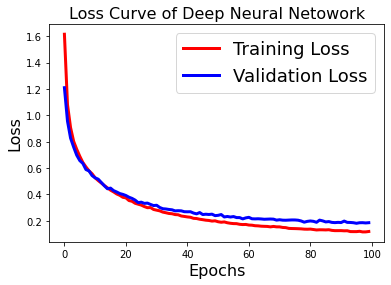

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

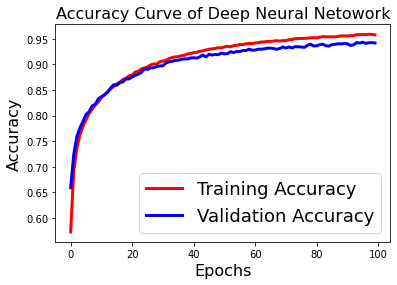

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([ 2, 12,  0, ...,  0,  0,  0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

12

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 94.20191085306877


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     35294
           1       0.96      0.90      0.93      2483
           2       0.96      0.92      0.94      2337
           3       0.97      0.91      0.94      2284
           4       0.91      0.94      0.92      2142
           5       0.93      0.87      0.90      2448
           6       0.96      0.95      0.96      2195
           7       0.96      0.88      0.92      2517
           8       0.95      0.88      0.92      2756
           9       0.94      0.93      0.93      2446
          10       0.95      0.90      0.92      2278
          11       0.93      0.95      0.94      2523
          12       0.92      0.97      0.94      2434
          13       0.91      0.97      0.94      1369
          14       0.93      0.90      0.91      1324
          15       0.93      0.81      0.86      1375
          16       0.97      0.95      0.96      1520
 

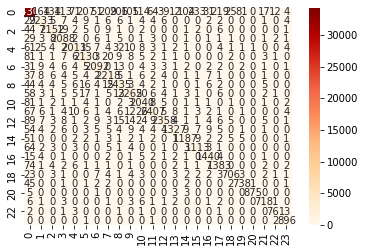

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4871102606781038
MSE: 5.895505956671603
RMSE: 2.4280662998920772


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9423150315053775
Recall Score :  0.9420191085306877
f1_score :  0.9416205119496515
